<a href="https://colab.research.google.com/github/Alien-is-here/AI-ML-Intern/blob/main/Heart_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lazypredict
!pip install pandas-profiling


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid
from lightgbm import LGBMClassifier

In [4]:
#df1 = pd.read_csv("heart_disease_data.csv")
#df1.head()

In [5]:
df = pd.read_csv("heart1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.duplicated().sum()

723

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(302, 14)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.72,2.31,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [13]:
df.value_counts(df["target"])

,count
target,
1,164
0,138


In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.07,-0.22
sex,-0.09,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.05,0.14,0.10,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1.00,0.05,-0.07,0.10,0.04,0.29,-0.39,-0.15,0.12,-0.20,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.15
chol,0.21,-0.20,-0.07,0.13,1.00,0.01,-0.15,-0.01,0.06,0.05,0.00,0.09,0.10,-0.08
fbs,0.12,0.05,0.10,0.18,0.01,1.00,-0.08,-0.01,0.02,0.00,-0.06,0.14,-0.03,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
thalach,-0.40,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.38,-0.23,-0.09,0.42
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1.00,0.29,-0.26,0.13,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.00,-0.06,-0.34,0.29,1.00,-0.58,0.24,0.21,-0.43


**EDA**

<Axes: xlabel='target', ylabel='count'>

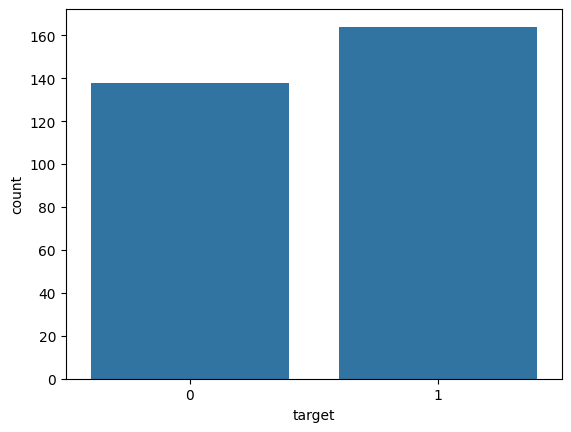

In [15]:
sns.countplot(x="target", data=df)

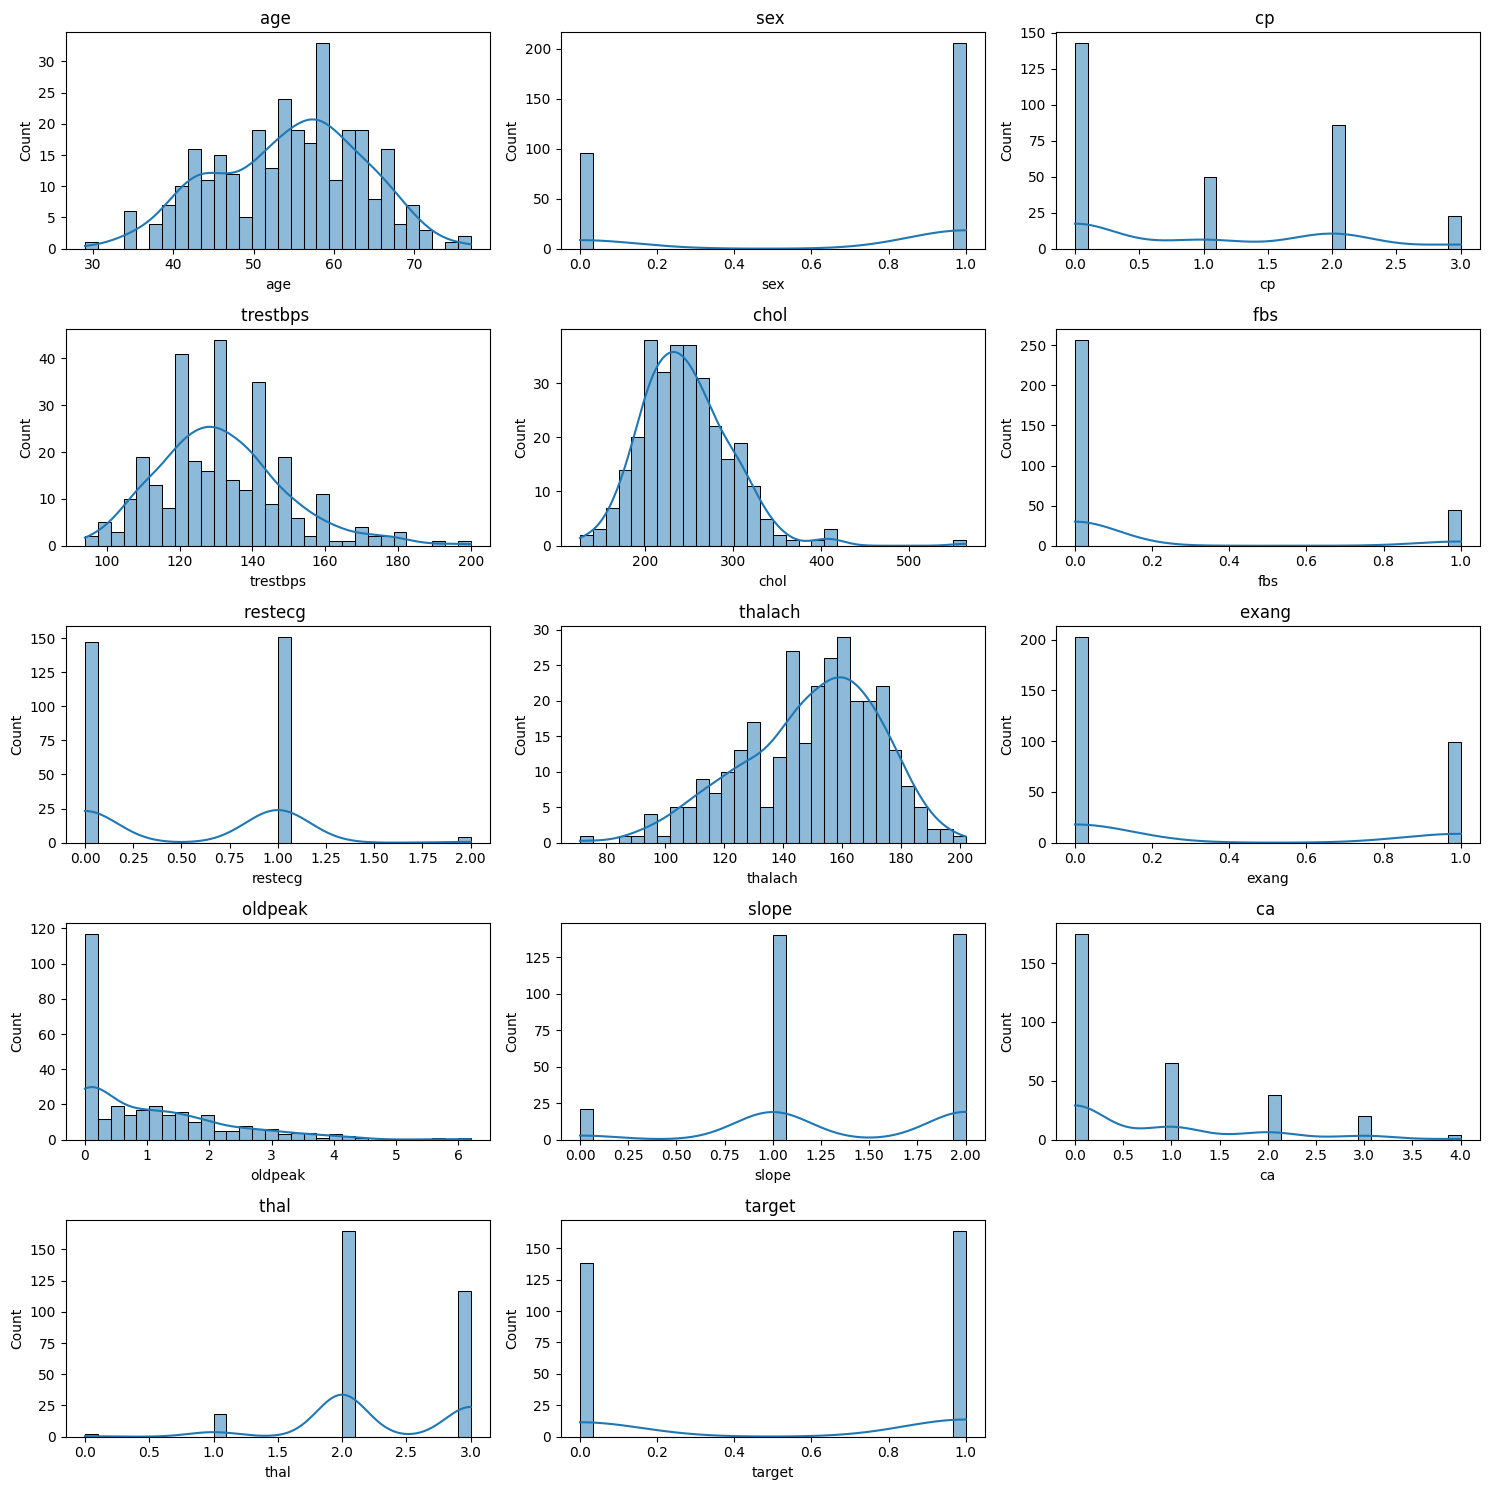

In [16]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True)
    plt.title(f'{feature} ')
plt.tight_layout()

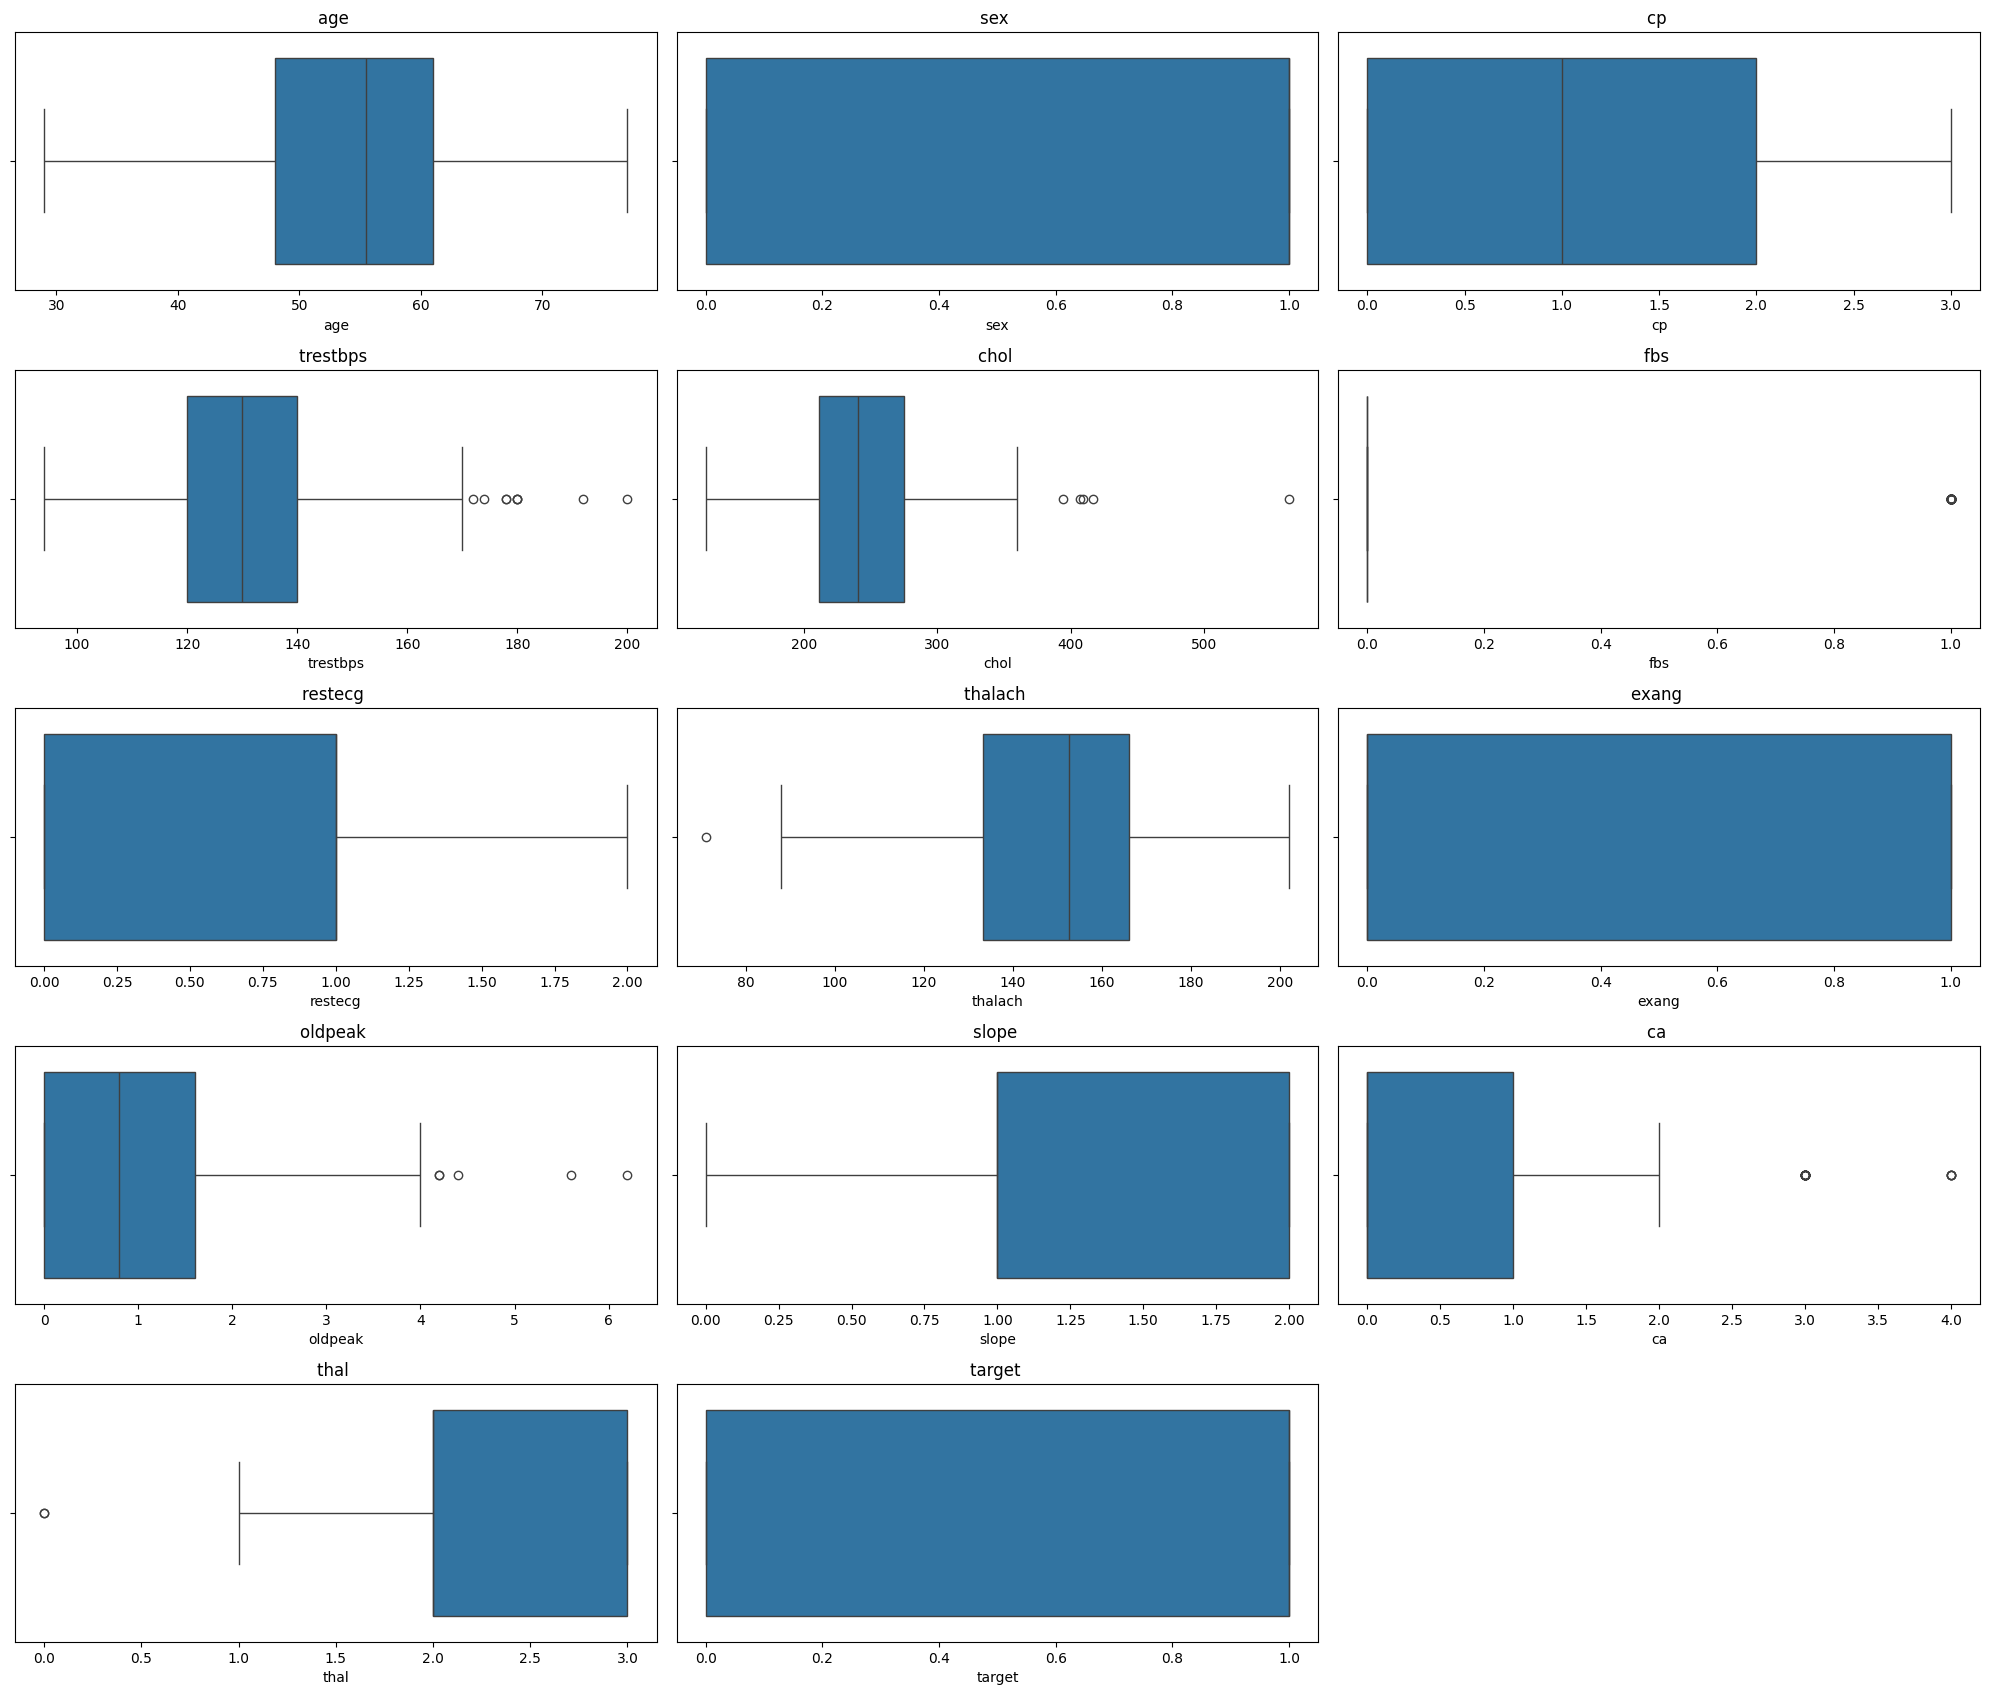

In [17]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(6, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
plt.tight_layout()

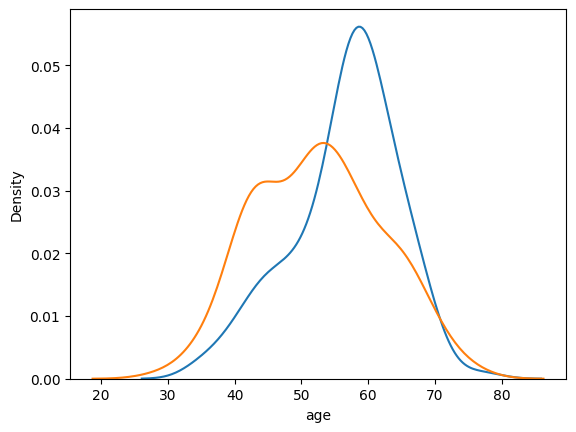

In [18]:
sns.distplot(df[df["target"]==0]['age'], hist=False)
sns.distplot(df[df["target"]==1]['age'], hist=False)
plt.show();

In [19]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,92


<Axes: xlabel='sex', ylabel='target'>

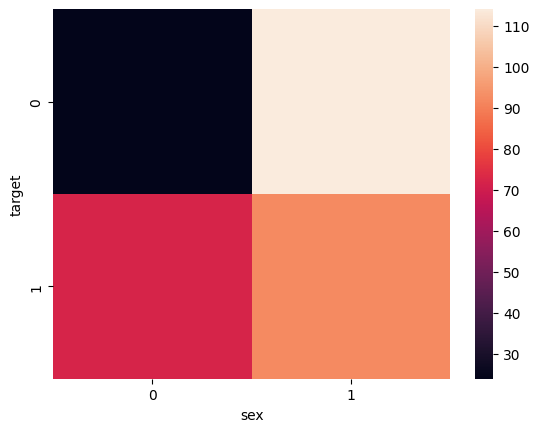

In [20]:
sns.heatmap(pd.crosstab(df["target"], df["sex"]))

In [21]:
df.groupby('sex').mean()['target']*100

,target
sex,
0,75.00
1,44.66


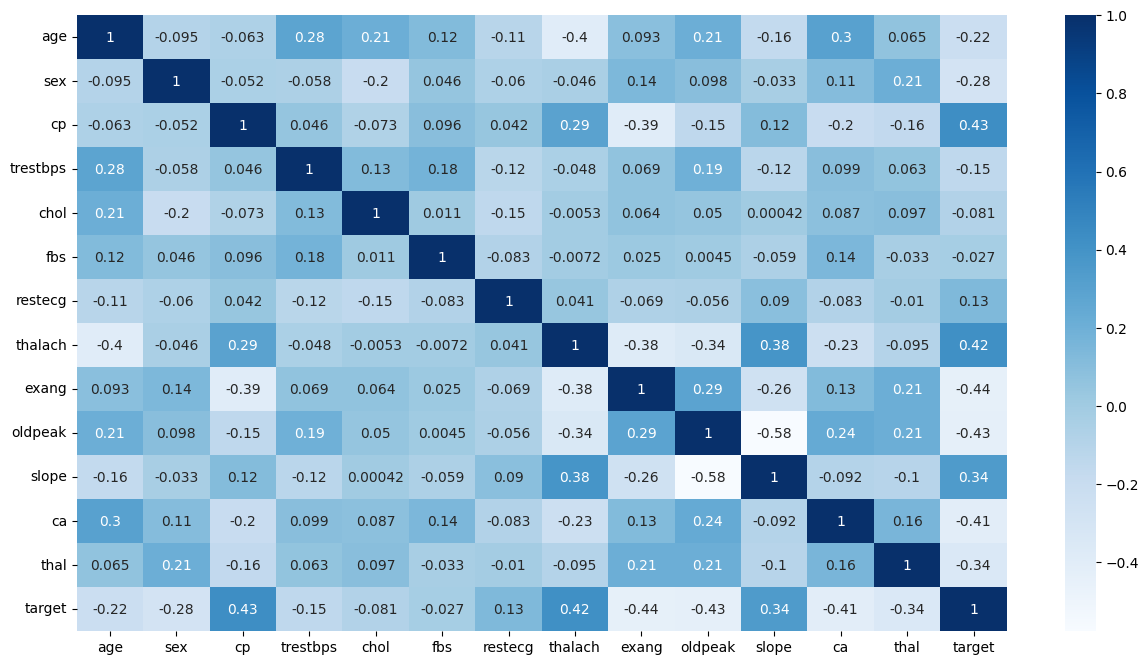

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [23]:
X = df.drop("target", axis=1)
y = df["target"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
for column in X_train.columns:
    print(column," :", X_train[column].skew())

age  : -0.17929660229580893
sex  : -0.7790551578104845
cp  : 0.3876194768000819
trestbps  : 0.8762270563629027
chol  : 1.1305304543962167
fbs  : 1.9342685325440705
restecg  : 0.16076185140548793
thalach  : -0.5082180038717337
exang  : 0.6785806603304873
oldpeak  : 1.1680531401060887
slope  : -0.42976170692482996
ca  : 1.3741068338397144
thal  : -0.5216617445020575


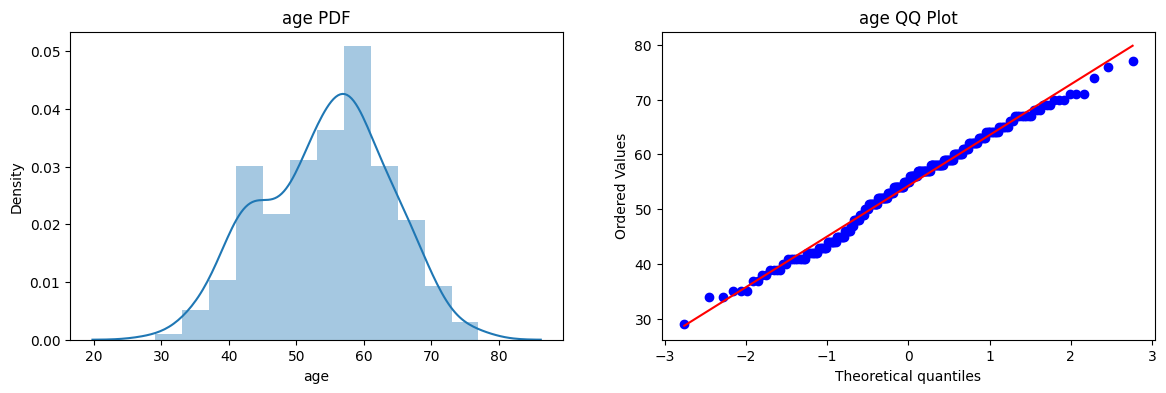

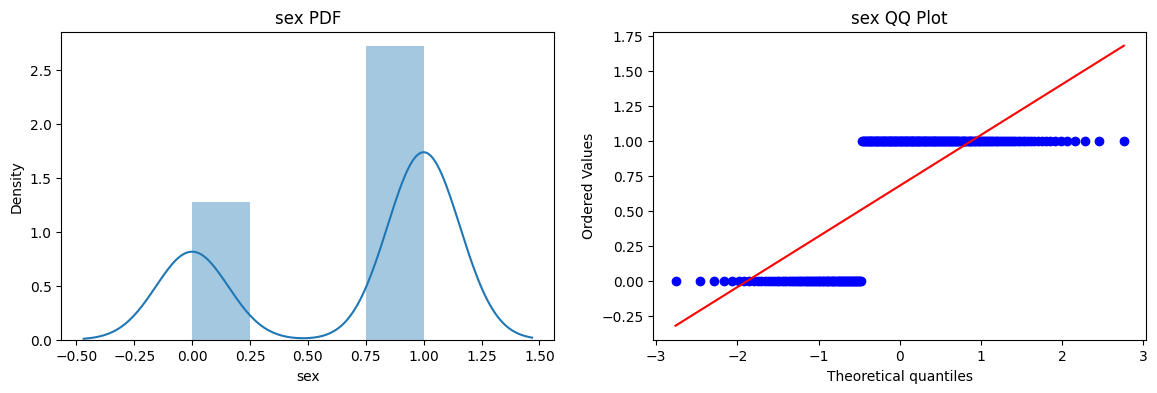

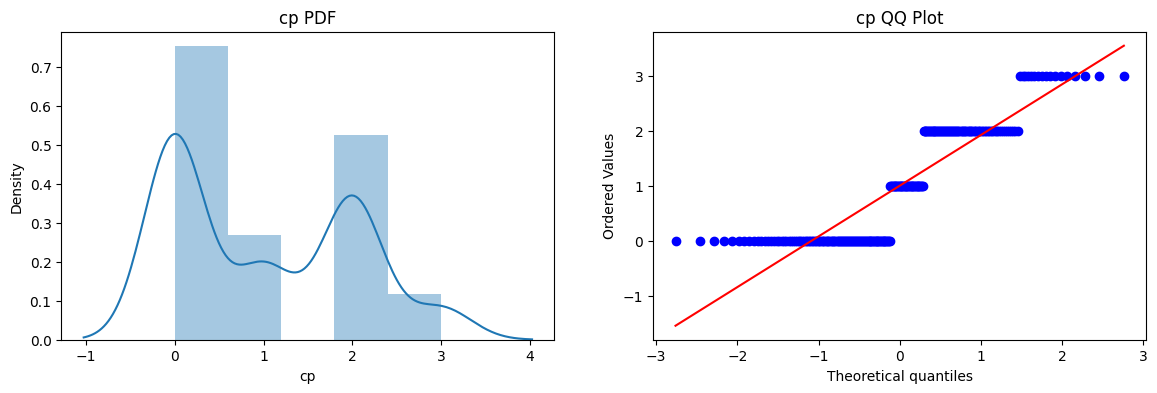

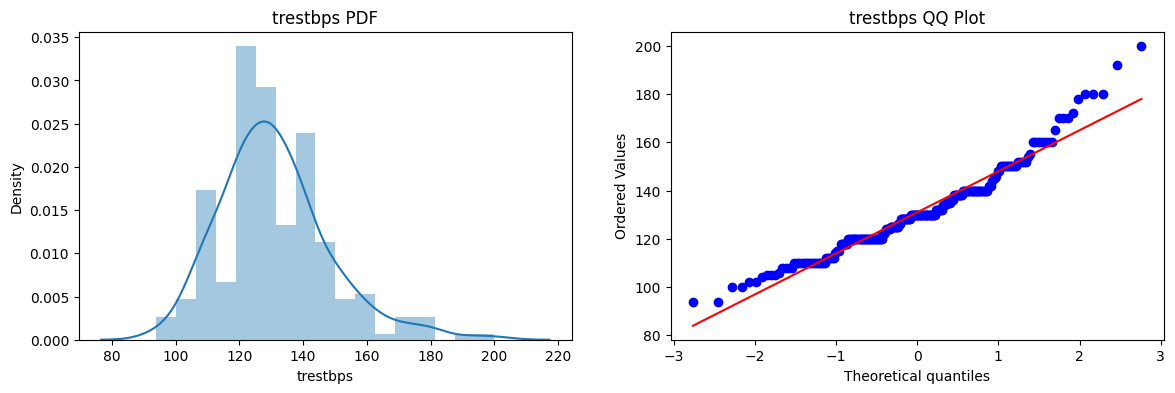

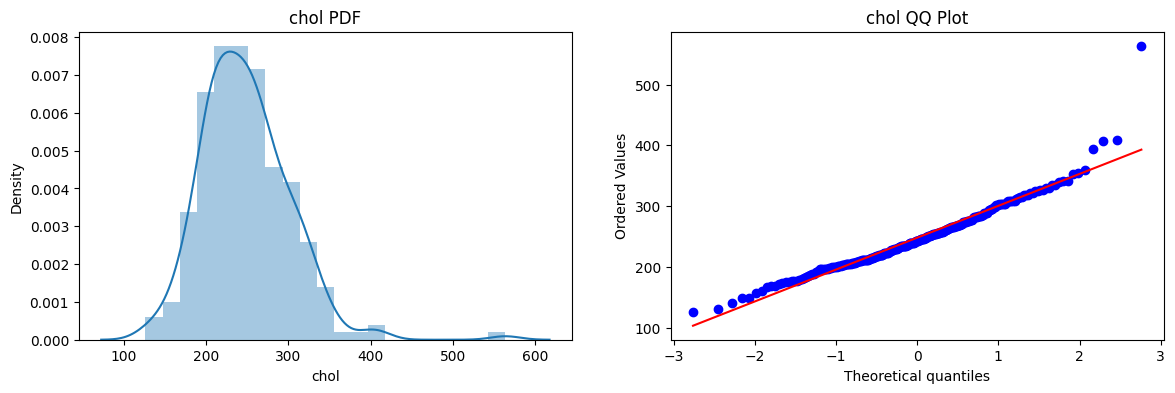

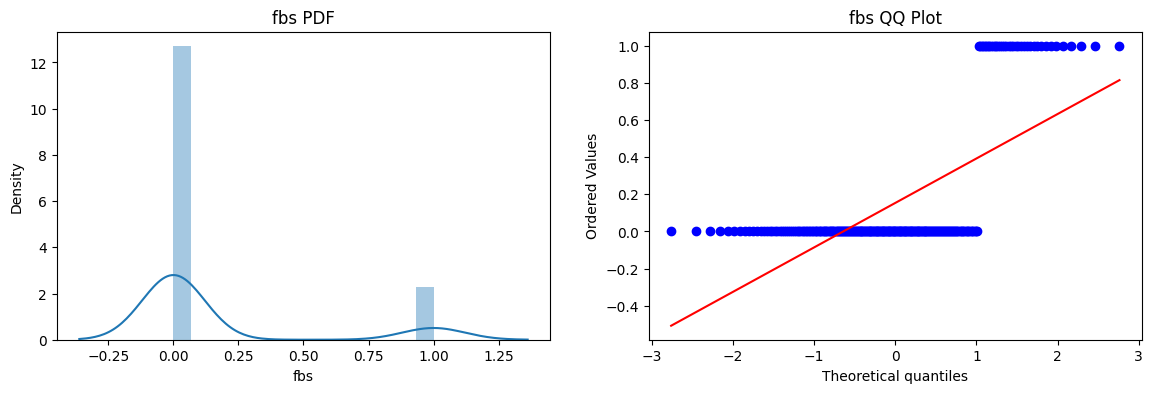

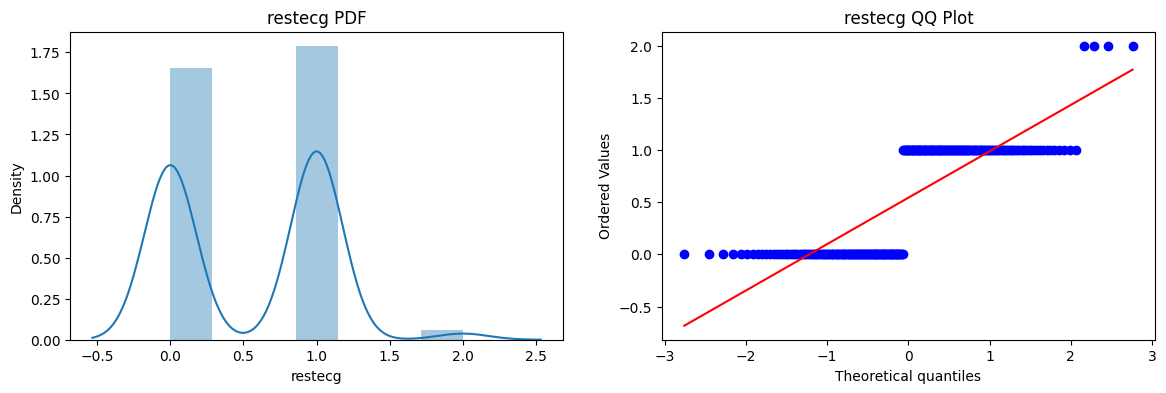

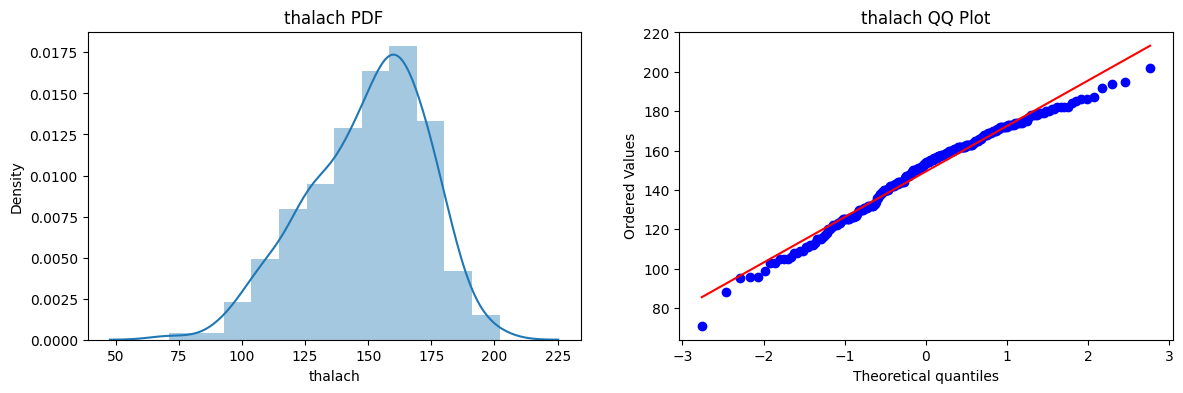

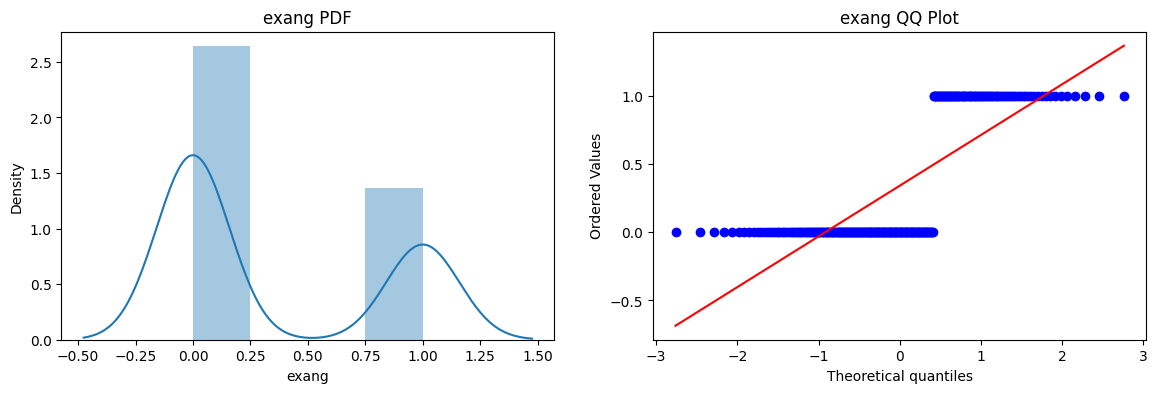

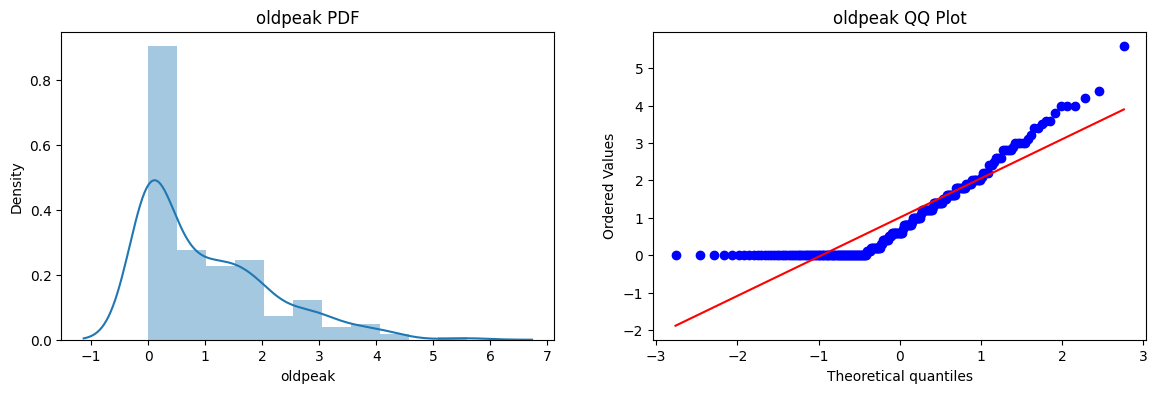

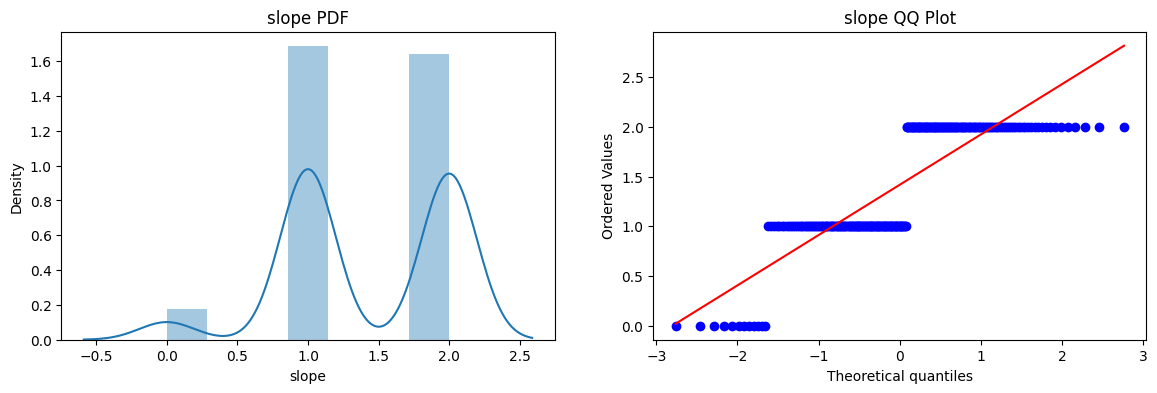

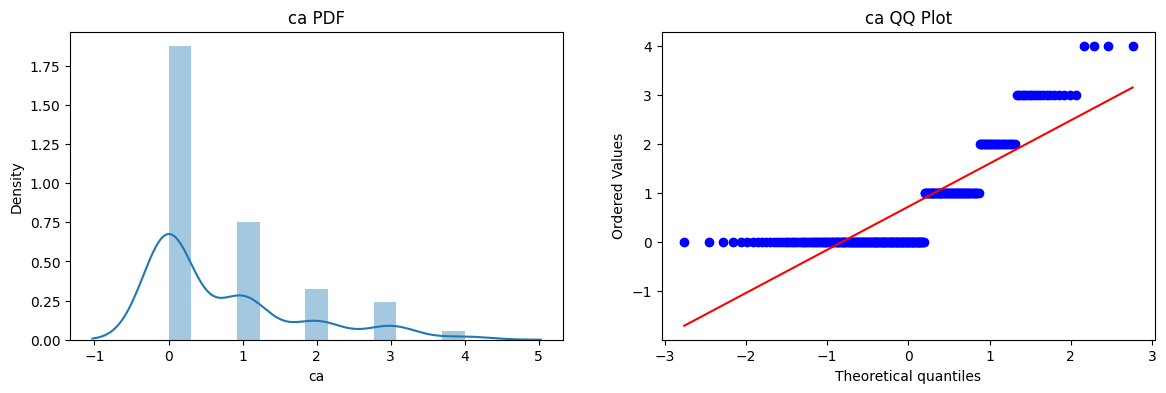

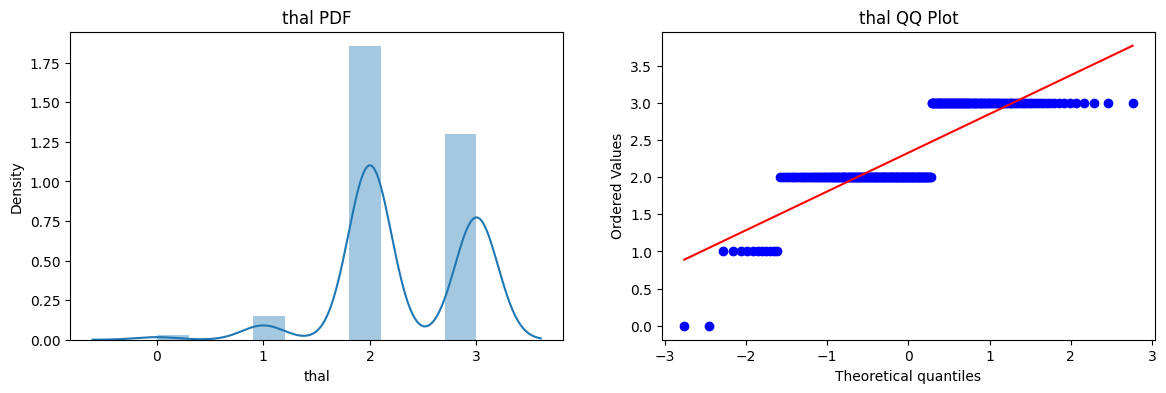

In [ ]:
for i, column in enumerate(X_train.columns):
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    sns.distplot(X_train[column])  # Access column by name
    plt.title(f'{column} PDF')  # Use column name directly
    plt.subplot(122)
    stats.probplot(X_train[column], dist="norm", plot=plt)  # Access column by name
    plt.title(f'{column} QQ Plot')  # Use column name directly

    plt.show()

In [ ]:
#trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['age','cp','chol','trestbps','sex']),
                       #  ('square',FunctionTransformer(np.square),['slope','restecg','thal','ca','thalach'])],remainder='passthrough')

#X_train_tf = trf.fit_transform(X_train)
#X_test_tf = trf.transform(X_test)

In [ ]:
#X_train_tf = pd.DataFrame(X_train_tf, columns=X_train.columns)


In [ ]:
#for i in range(X_train_tf.shape[1]):
 #   print(X_train.columns[i] ," :",X_train_tf.iloc[:, i].skew()) # Use iloc to select the column as a Series

In [ ]:
#for i, column in enumerate(X_train.columns):
  #  plt.figure(figsize=(14, 4))

 #   plt.subplot(121)
 #   sns.distplot(X_train_tf[column])  # Access column by name
 #   plt.title(f'{column} PDF')  # Use column name directly
 #   plt.subplot(122)
 #   stats.probplot(X_train_tf[column], dist="norm", plot=plt)  # Access column by name
#    plt.title(f'{column} QQ Plot')  # Use column name directly

 #   plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
models

In [ ]:
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2','auto']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [500 , 1000],
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'shrinking': [True, False],

    },
    'DecisionTreeClassifier': {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'criterion': ['gini', 'entropy']
    },
    'GaussianNB': {},  # No hyperparameters to tune for GaussianNB
    'QuadraticDiscriminantAnalysis': {
        'reg_param': [0.0, 0.1, 0.5, 1.0],
        'tol': [1e-4, 1e-3, 1e-2],
    },
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    },
    'NuSVC': {
        'nu': [0.1, 0.5, 0.9],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
    },
    'LGBMClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 10, 20],
    },
    'BernoulliNB': {
        'alpha': [0.1, 0.5, 1.0],
        'binarize': [None, 0.0, 0.5],
    },
    'NearestCentroid': {
        'metric': ['euclidean', 'manhattan'],
    },
}

model_dict = {
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'NuSVC': NuSVC(),
    'LGBMClassifier': LGBMClassifier(),
    'BernoulliNB': BernoulliNB(),
    'NearestCentroid': NearestCentroid(),
}

print("\nTraining and Tuning Models:")
print("-" * 50)

models_to_tune = {name: model for name, model in model_dict.items() if name in param_grids}
model_accuracies = {}
for model_name, model in models_to_tune.items():
    print(f"\nTuning {model_name}...")
    param_grid = param_grids[model_name]

    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:

        best_model = model
        best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")



In [ ]:
preformance_accuracy = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
preformance_accuracy


In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[
    ('KN', KNeighborsClassifier()),
    ('rf', RandomForestClassifier()),
    ('qda', QuadraticDiscriminantAnalysis()),
    ('bn', BernoulliNB()),
    ('gnb', GaussianNB())
], voting='soft')
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
df2.shape